In [3]:
from datetime import datetime
from sklearn.manifold import TSNE
import pickle

import argparse
import copy
import numpy as np
import time
import os
from PIL import Image
import matplotlib.pyplot as plt
import plotly
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.tools.set_credentials_file(username='sedabilaloglu', api_key='4qfIDNxumSjAsMTGxTgD')
from plotly.graph_objs import Bar, Scatter, Figure, Layout
import numpy as np
from itertools import compress

In [4]:
t = pickle.load(open( "file_names_3.p", "rb" ))


In [5]:
import pickle
l = pickle.load( open( "labels_all_3.p", "rb" ))
f = pickle.load( open( "finalWs_all_3.p", "rb" ))
p = pickle.load( open( "predictions_all_3.p", "rb" ))
#actual predictions

p = np.argmax(p, axis=1)

In [6]:
len(f)

877

In [7]:
def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    plt.figure(figsize=(20, 20))  #in inches
    for i, label in enumerate(labels):
        x, y = lowDWeights[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                xy=(x, y),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
    plt.show()
    #plt.savefig(filename)
    
#'TCGA-LUAD': 7, '
#'TCGA-KIRC': 5, 
#'Solid_Tissue_Normal_Lung': 2, 
#'TCGA-LUSC': 8, 
#'TCGA-KIRP': 6, 
#'TCGA-BRCA': 3, 
#'Solid_Tissue_Normal_Kidney': 1, 
#'Solid_Tissue_Normal_Breast': 0, 
#'TCGA-KICH': 4

In [8]:
type(f)
f_filter = []
l_filter = []
t_filter = []
p_filter = []
f[0]


array([0.02053796, 0.00380778, 0.00703983, ..., 0.09226191, 0.08927917,
       0.09227707])

In [9]:
np.isnan(f).sum()
for x in range(1,len(f)):
    array = f[x]
    array2 = l[x]
    array3 = t[x]
    array4 = p[x]
    if ~np.isnan(array[0]):
        f_filter.append(array)
        l_filter.append(array2)
        t_filter.append(array3)
        p_filter.append(array4)
tt_filter = np.array(t_filter)


In [10]:
#combine the name of the file along with the label and the predictions 
data = zip(t_filter,p_filter,l_filter)
test_results = pd.DataFrame(list(data), columns=['file_name','predicted_class','actual_label'])
#test_results = test_results.replace(0,'Normal_Breast').replace(1,'Normal_Kidney').replace(2,'Normal_Lung').replace(3,'TCGA-BRCA').replace(4,'TCGA-KICH').replace(5,'TCGA-KIRC').replace(6,'TCGA-KIRP').replace(7,'TCGA-LUAD').replace(8,'TCGA-LUSC')
test_results.to_csv('test_tsne_results.csv')
test_results           

,file_name,predicted_class,actual_label
0,test_TCGA-BP-4340-01A-01-TS1.aca359ae-b140-4f3...,5,5
1,test_TCGA-CZ-5464-01A-01-TS1.ebeb25cc-4229-416...,5,5
2,test_TCGA-BP-5185-01A-01-TS1.1a83fb56-c724-42f...,5,5
3,test_TCGA-CJ-5677-01A-01-TS1.62b96377-119b-418...,5,5
4,test_TCGA-CJ-4643-01A-01-TS1.cd5dede4-80cc-48a...,5,5
5,test_TCGA-BP-4774-01A-01-TS1.8505fa70-5941-4ee...,5,5
6,test_TCGA-CZ-5465-01A-01-TS1.a792fb44-6324-493...,5,5
7,test_TCGA-BP-5187-01A-01-TS1.849c8b4b-403b-4b7...,5,5
8,test_TCGA-A3-3328-01A-01-BS1.cba39f7f-a590-4a0...,5,5
9,test_TCGA-B2-5633-01B-03-BS3.06E95813-55FF-4A6...,5,5


In [11]:
#import the Paolo's hormone file

metadata = pd.read_csv('nationwidechildrens.org_clinical_patient_brca.csv')

her2 = metadata[['bcr_patient_barcode','her2_ihc_score','her2_fish_status']]
her2['class']=np.nan
for index, row in her2.iterrows():
    if row['her2_ihc_score']=='3+':
        her2.loc[index, 'class']='Pos'
    elif row['her2_ihc_score']=='0':
        her2.loc[index, 'class']='Neg'
    elif row['her2_ihc_score']=='1+':
        temp_1 = row['her2_fish_status']
        if temp_1=='Negative':
            her2.loc[index, 'class']='Neg'
        elif temp_1=='Positive':
            her2.loc[index, 'class']='Pos'
        else:
            her2.loc[index, 'class']=np.nan
    elif row['her2_ihc_score']=='2+':
        temp_2 = row['her2_fish_status']
        if temp_2=='Negative':
            her2.loc[index, 'class']='Neg'
        elif temp_2=='Positive':
            her2.loc[index, 'class']='Pos'
        else:
            her2.loc[index, 'class']=np.nan
    else:
        temp_3 = row['her2_fish_status']
        if temp_3=='Negative':
            her2.loc[index, 'class']='Neg'
        elif temp_3=='Positive':
            her2.loc[index, 'class']='Pos'
        else:
            her2.loc[index, 'class']=np.nan

#For this, consider 3+ as positive and 0 as negative. 
#If it's 1+ or 2+, refer to another column "lab_procedure_her2_neu_in_situ_hybrid_outcome_type" 
#All the 1+ and 2+ results would've been analyzed via a different method to determine Her2 status.
#This column should have them now as either positive or negative. 
er = metadata[['bcr_patient_barcode','er_status_by_ihc']]
er['class']=np.nan
for index, row in er.iterrows():
    if row['er_status_by_ihc']=='Negative':
        er.loc[index, 'class']='Neg'
    elif row['er_status_by_ihc']=='Positive':
        er.loc[index, 'class']='Pos'
    else:
        er.loc[index, 'class']=np.nan 
        
        
pr = metadata[['bcr_patient_barcode','pr_status_by_ihc']]
pr['class']=np.nan
for index, row in pr.iterrows():
    if row['pr_status_by_ihc']=='Negative':
        pr.loc[index, 'class']='Neg'
    elif row['pr_status_by_ihc']=='Positive':
        pr.loc[index, 'class']='Pos'
    else:
        pr.loc[index, 'class']=np.nan 

metadata['pr'] = pr['class']
metadata['er'] =er['class']
metadata['her2'] =her2['class']


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages

# combine

In [12]:
pr_er_her2 = metadata[['bcr_patient_barcode','pr','er','her2']]
pr_er_her2['class']=np.nan
for index, row in pr_er_her2.iterrows():
    if ((row['pr']=='Neg')&(row['er']=='Neg')&(row['her2']=='Neg')):
        pr_er_her2.loc[index, 'class']='all_negative'
    elif (row['her2']=='Pos'):
        pr_er_her2.loc[index, 'class']='her2_positive'
    elif((row['her2']=='Neg')&(row['er']=='Pos')):
        pr_er_her2.loc[index, 'class']='er_pos_her2_neg' 



pr_er_her2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is tr

,bcr_patient_barcode,pr,er,her2,class
0,TCGA-3C-AAAU,Pos,Pos,NaN,NaN
1,TCGA-3C-AALI,Pos,Pos,NaN,NaN
2,TCGA-3C-AALJ,Pos,Pos,NaN,NaN
3,TCGA-3C-AALK,Pos,Pos,NaN,NaN
4,TCGA-4H-AAAK,Pos,Pos,NaN,NaN
5,TCGA-5L-AAT0,Pos,Pos,NaN,NaN
6,TCGA-5L-AAT1,Pos,Pos,NaN,NaN
7,TCGA-5T-A9QA,Neg,Pos,Neg,er_pos_her2_neg
8,TCGA-A1-A0SB,Neg,Pos,NaN,NaN
9,TCGA-A1-A0SD,Pos,Pos,NaN,NaN


In [13]:
# new data frame with split value columns 
dat = test_results["file_name"].str.split("_", n = 1, expand = True) 
  
# making seperate first name column from new data frame 
test_results["bcr_patient_barcode"]= dat[1].str[:12]
  
merged = test_results.merge(pr_er_her2, left_on='bcr_patient_barcode', right_on='bcr_patient_barcode',how='left')
merged[(merged['class']=='all_negative') &(merged['actual_label']==3)]


,file_name,predicted_class,actual_label,bcr_patient_barcode,pr,er,her2,class
664,test_TCGA-A2-A0YE-01A-01-TS1.03c71807-b82c-4b0...,3,3,TCGA-A2-A0YE,Neg,Neg,Neg,all_negative
674,test_TCGA-A7-A0CE-01A-01-TS1.3025a9c8-a7e4-404...,3,3,TCGA-A7-A0CE,Neg,Neg,Neg,all_negative
676,test_TCGA-E2-A159-01A-01-TSA.257b9eec-d799-454...,8,3,TCGA-E2-A159,Neg,Neg,Neg,all_negative
725,test_TCGA-B6-A409-01A-01-TS1.02A10D0A-2B31-416...,8,3,TCGA-B6-A409,Neg,Neg,Neg,all_negative
737,test_TCGA-E2-A573-01A-01-TS1.E5F5ABA4-595A-41C...,3,3,TCGA-E2-A573,Neg,Neg,Neg,all_negative
782,test_TCGA-AR-A1AQ-01A-01-TSA.113b2018-7bb9-44b...,3,3,TCGA-AR-A1AQ,Neg,Neg,Neg,all_negative
810,test_TCGA-EW-A1P1-01A-03-TSC.8fd02727-ac5a-449...,3,3,TCGA-EW-A1P1,Neg,Neg,Neg,all_negative
857,test_TCGA-A2-A04P-01A-03-BSC.31dbf72c-2aef-4b1...,3,3,TCGA-A2-A04P,Neg,Neg,Neg,all_negative
861,test_TCGA-AQ-A54N-01A-01-TS1.99108B68-B143-43A...,3,3,TCGA-AQ-A54N,Neg,Neg,Neg,all_negative
869,test_TCGA-E2-A1LK-01A-02-TSB.5f4a6e3e-8c5c-43b...,3,3,TCGA-E2-A1LK,Neg,Neg,Neg,all_negative


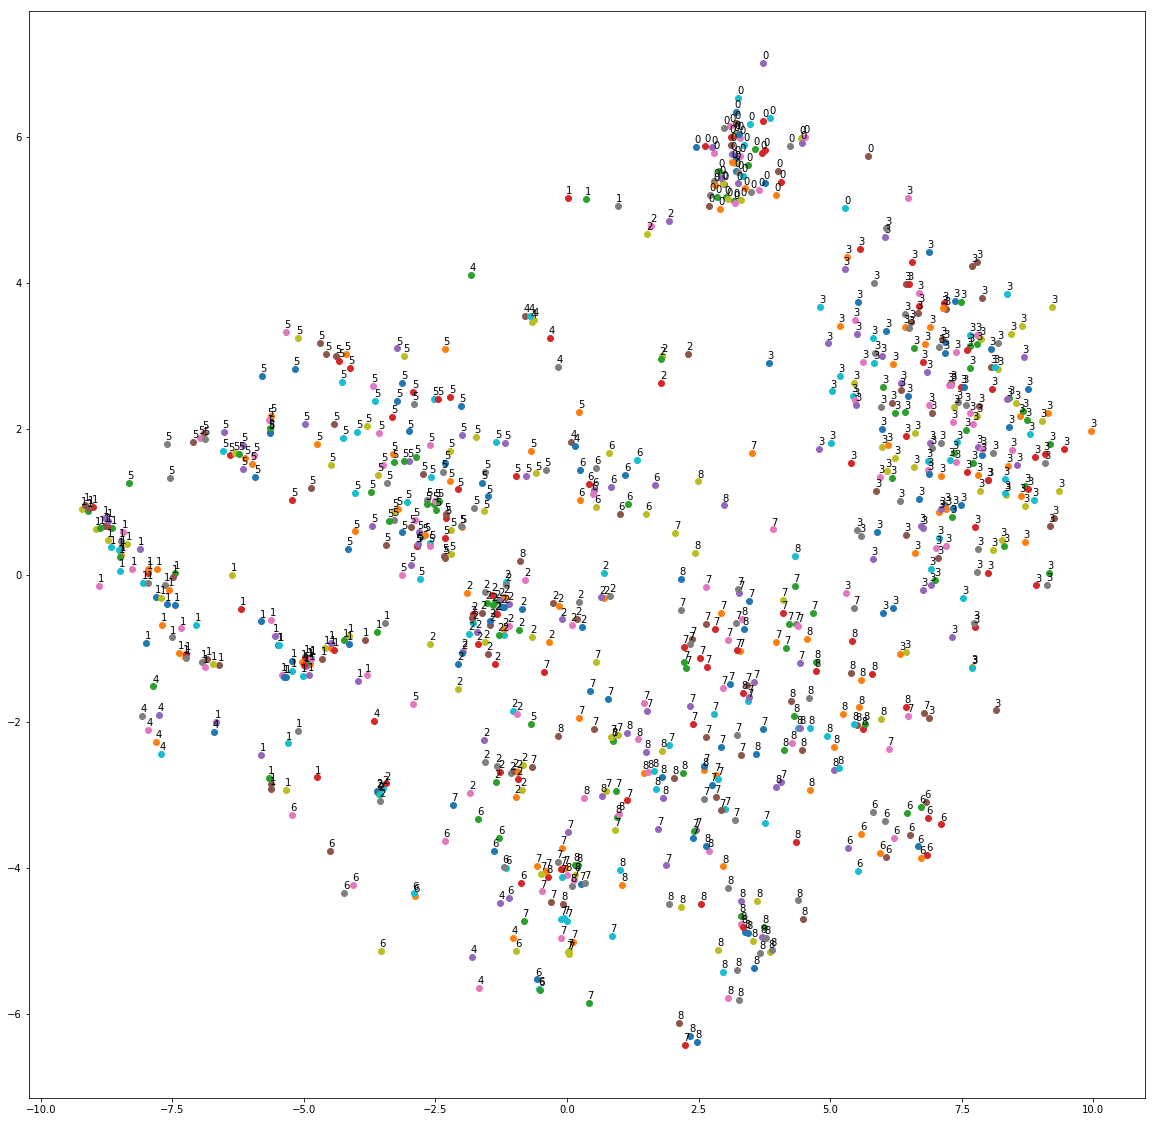

In [14]:
%matplotlib inline  
#import numpy as np
#from sklearn.manifold import TSNE

tsne = TSNE(perplexity=200, n_components=2, init='pca', n_iter=2000,random_state=1800)
plot_only = 500
lowDWeights = tsne.fit_transform(f_filter)
labels = l_filter#['0','1','2','3','4','5','6','7','8','0','1','2','3','4','5','6','7','8','0','1','2','3','4','5','6','7','8','0','1','2','3','4','5','6','7','8']
plot_with_labels(lowDWeights, labels)

plt.show()

In [15]:
ip1_tsne_display = lowDWeights #[display_indices]
labels_display = l_filter #[display_indices]
labels_display

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


# interactive plots

In [27]:
seed_list = np.arange(100, 200, 1)

for seed in seed_list:
    tsne = TSNE(perplexity=200, n_components=2, init='pca', n_iter=2000,random_state=seed)
    ip1_tsne_display = tsne.fit_transform(f_filter)
    labels_display = l_filter

    trace0 = go.Scatter(
        x = ip1_tsne_display[np.array(labels_display) == 0, 0], 
        y = ip1_tsne_display[np.array(labels_display) == 0, 1],
        name = 'Normal_Breast',
        mode = 'markers',
        text=tt_filter[np.array(np.array(labels_display) == 0, dtype=bool)],
        marker = dict(
            size = 10,
            color = 'darkblue',
            line = dict(
                width = 2,
                color = 'rgb(0, 0, 0)'
            )
        )
    )

    trace1 = go.Scatter(
        x = ip1_tsne_display[np.array(labels_display) == 1, 0], 
        y = ip1_tsne_display[np.array(labels_display) == 1, 1],
        name = 'Normal_Kidney',
        mode = 'markers',
        text=tt_filter[np.array(np.array(labels_display) == 1, dtype=bool)],
        marker = dict(
            size = 10,
            color = 'darkgreen',
            line = dict(
                width = 2,
            )
        )
    )


    trace2 = go.Scatter(
        x = ip1_tsne_display[np.array(labels_display) == 2, 0], 
        y = ip1_tsne_display[np.array(labels_display) == 2, 1],
        name = 'Normal_Lung',
        mode = 'markers',
        text=tt_filter[np.array(np.array(labels_display) == 2, dtype=bool)],
        marker = dict(
            size = 10,
            color = 'darkred',
            line = dict(
                width = 2,
            )
        )
    )

    trace3 = go.Scatter(
        x = ip1_tsne_display[(merged['class']!='all_negative') &(merged['actual_label']==3), 0], 
        y = ip1_tsne_display[(merged['class']!='all_negative') &(merged['actual_label']==3), 1],
        name = 'TCGA-BRCA',
        mode = 'markers',
        text=list(compress(tt_filter, list((merged['class']!='all_negative') &(merged['actual_label']==3)))),
        marker = dict(
            size = 10,
            color = 'dodgerblue',
            line = dict(
                width = 2,
            )
        )
    )

    trace3_ = go.Scatter(
        x = ip1_tsne_display[(merged['class']=='all_negative') &(merged['actual_label']==3), 0], 
        y = ip1_tsne_display[(merged['class']=='all_negative') &(merged['actual_label']==3), 1],
        name = 'TCGA-BRCA-negative-her2-er-pr',
        mode = 'markers',
        text=list(compress(tt_filter, list((merged['class']=='all_negative') &(merged['actual_label']==3)))),
        marker = dict(
            size = 10,
            color = 'aqua',
            line = dict(
                width = 2,
            )
        )
    )



    trace4 = go.Scatter(
        x = ip1_tsne_display[np.array(labels_display) == 4, 0], 
        y = ip1_tsne_display[np.array(labels_display) == 4, 1],
        name = 'TCGA-KICH',
        mode = 'markers',
        text=tt_filter[np.array(np.array(labels_display) == 4, dtype=bool)],
        marker = dict(
            size = 10,
            color = 'mediumspringgreen',
            line = dict(
                width = 2,
            )
        )
    )


    trace5 = go.Scatter(
        x = ip1_tsne_display[np.array(labels_display) == 5, 0], 
        y = ip1_tsne_display[np.array(labels_display) == 5, 1],
        name = 'TCGA-KIRC',
        mode = 'markers',
        text=tt_filter[np.array(np.array(labels_display) == 5, dtype=bool)],
        marker = dict(
            size = 10,
            color = 'lightseagreen',
            line = dict(
                width = 2,
            )
        )
    )


    trace6 = go.Scatter(
        x = ip1_tsne_display[np.array(labels_display) == 6, 0], 
        y = ip1_tsne_display[np.array(labels_display) == 6, 1],
        name = 'TCGA-KIRP',
        mode = 'markers',
        text=tt_filter[np.array(np.array(labels_display) == 6, dtype=bool)],
        marker = dict(
            size = 10,
            color = 'lawngreen',
            line = dict(
                width = 2,
            )
        )
    )


    trace7 = go.Scatter(
        x = ip1_tsne_display[np.array(labels_display) == 7, 0], 
        y = ip1_tsne_display[np.array(labels_display) == 7, 1],
        name = 'TCGA-LUAD',
        mode = 'markers',
        text=tt_filter[np.array(np.array(labels_display) == 7, dtype=bool)],
        marker = dict(
            size = 10,
            color = 'salmon',
            line = dict(
                width = 2,
            )
        )
    )


    trace8 = go.Scatter(
        x = ip1_tsne_display[np.array(labels_display) == 8, 0], 
        y = ip1_tsne_display[np.array(labels_display) == 8, 1],
        name = 'TCGA-LUSC',
        mode = 'markers',
        text=tt_filter[np.array(np.array(labels_display) == 8, dtype=bool)],
        marker = dict(
            size = 10,
            color = 'fuchsia',
            line = dict(
                width = 2,
            )
        )
    )

    data = [trace0, trace1,trace2, trace3,trace3_,trace4, trace5,trace6, trace7,trace8]

    layout = dict(title = 'tsne',
                  yaxis = dict(zeroline = False),
                  xaxis = dict(zeroline = False)
                 )

    fig = dict(data=data, layout=layout)
    plotly.offline.plot(fig, filename='tsne-images/tsne_'+str(seed)+'.html')